# Reconfiguration of NZF

In [220]:
P = graphs.PetersenGraph()
T = next(P.spanning_trees())
P0 = next(P.orientations())

In [221]:
E = P.edges(labels=False); E
E1 = T.edges(labels=False)
E0 = [e for e in E if not e in E1]
m = len(E); m0 = len(E0); m1 = len(E1)

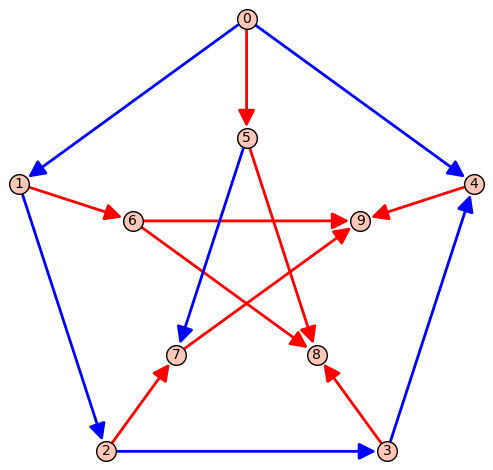

In [222]:
P0.plot(edge_colors={'red':E1, 'blue': E0})

In [223]:
V = VectorSpace(GF(5), m)
z = V.zero()

def elvect(d):
    L = [0]*m
    L[d] = 1
    return V(L)

d = {}
for u,v in E0:
    d[(u,v)] = T.all_paths(u,v)[0]

def el_flow(u,v):
    path = d[(u,v)]
    f = V.zero()
    LE = list(E)
    l = len(path)
    for i in range(l):
        x = path[i]
        y = path[(i+1)%l]
        if x>y: 
            sign = -1
            x,y = y,x
        else:
            sign = 1
        f += elvect(LE.index((x,y)))*sign
    return f

In [224]:
el_flow(0,1)

(4, 0, 1, 0, 4, 0, 0, 0, 0, 0, 0, 1, 4, 0, 0)

## Checks

We verify that each elementary flow is a flow by multiplying by the incidence matrix.
This is the matrix with rows indexed by vertices, columns by edges. For edge e=(u,v) we have
+1 at position (v,e) and -1 at position (u,e). 

In [174]:
I = P.incidence_matrix(oriented=True)

In [175]:
for u,v in E0:
    print(u,v, I*el_flow(u,v))

0 1 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
0 4 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
1 2 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
2 3 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
3 4 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
5 7 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0)


We also look at the flow and a picture.

In [83]:
def read_flow(f):
    for i in range(15):
        if f[i] != 0:
            print(f[i], E[i])

In [85]:
read_flow(el_flow(0,1))

4 (0, 1)
1 (0, 5)
4 (1, 6)
1 (5, 8)
4 (6, 8)


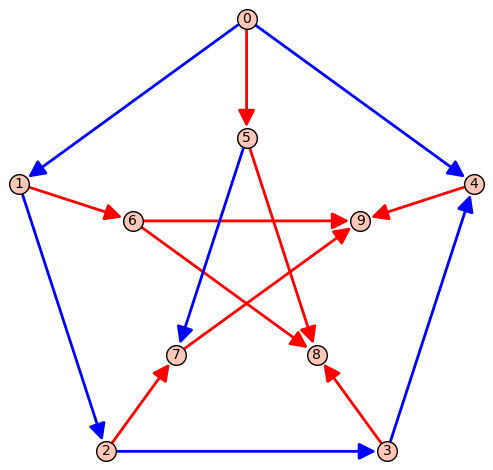

In [8]:
P0.plot(edge_colors={'red':E1, 'blue': E0})

Finally, let's plot the flow.

In [99]:
def plot_flow(P,f):
    Pc = copy(P0)
    for i in range(m):
        Pc.set_edge_label(E[i][0], E[i][1], f[i])
    return Pc.plot(edge_colors={'red':E1, 'blue': E0}, edge_labels=True)

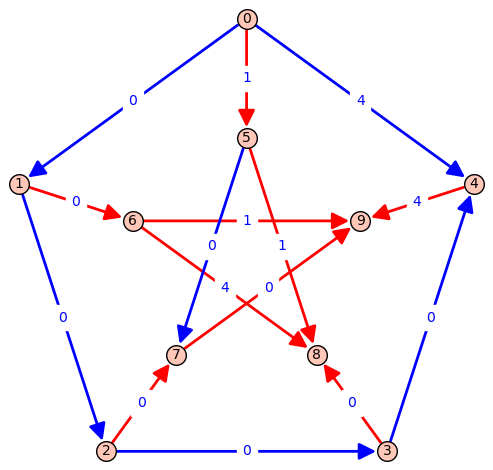

In [101]:
plot_flow(P,flow(0,4))

# Now we are ready to find the Nowhere Zero Flows

In [103]:
import itertools

In [110]:
t = next(itertools.product(range(1, 5), repeat=m0))

In [113]:
for val, e in zip(t,E0): 
    print(val, e)

1 (0, 1)
1 (0, 4)
1 (1, 2)
1 (2, 3)
1 (3, 4)
1 (5, 7)


In [116]:
for val, e in zip(t,E0): 
    print(val*el_flow(e[0], e[1]))

(0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0)


In [225]:
NZF_list = []

for t in itertools.product(range(1, 5), repeat=m0): 
    flow = sum([val*el_flow(e[0], e[1]) for val, e in zip(t,E0)])
    if len(flow.nonzero_positions()) == m:
        NZF_list.append(flow)

Verification by Tutte's polynomial (black magic, don't worry).

In [124]:
TP = P.tutte_polynomial(); TP

x^9 + 6*x^8 + 21*x^7 + 56*x^6 + 12*x^5*y + y^6 + 114*x^5 + 70*x^4*y + 30*x^3*y^2 + 15*x^2*y^3 + 10*x*y^4 + 9*y^5 + 170*x^4 + 170*x^3*y + 105*x^2*y^2 + 65*x*y^3 + 35*y^4 + 180*x^3 + 240*x^2*y + 171*x*y^2 + 75*y^3 + 120*x^2 + 168*x*y + 84*y^2 + 36*x + 36*y

In [125]:
TP(x=0, y=1-5)

240

## Now to create the graph

In [141]:
def support(fi):
    return [ E[i] for i in range(m) if fi[i] != 0 ]

In [242]:
def is_connected(fi,psi):
    #return P0.plot(edge_colors = {'red': support(fi-psi)})
    H = P.subgraph(edges = support(fi-psi))
    return max(H.degree_sequence()) < 3

In [161]:
for i in range(240):
    for j in range(i, 240):
        if is_connected(NZF[i], NZF[j]):
            print(i,j)

In [160]:
is_connected(NZF[10], NZF[51])

False

In [249]:
is_connected(NZF_list[10], NZF_list[110])

False

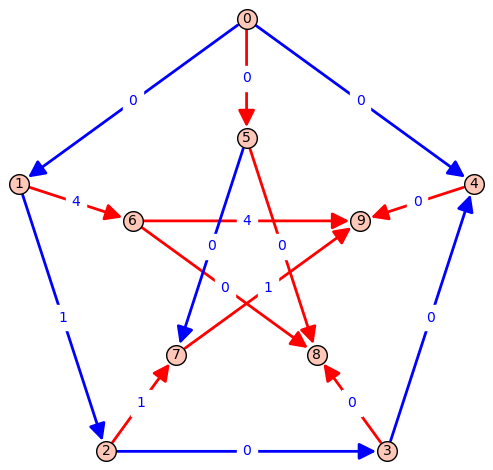

In [254]:
plot_flow(P, NZF_list[0]-NZF_list[8])

In [138]:
[E[i] for i in d[(0,1)]] 

[(0, 1), (2, 3), (3, 8), (2, 7), (0, 4), ()]

# Now do everything properly for k instead of 5

In [229]:
def zero_vector(k):
    return vector(Integers(k), [0]*m)
    
def elvect(k,d):
    L = [0]*m
    L[d] = 1
    return vector(Integers(k), L)


def el_flow(k,u,v):
    path = d[(u,v)]
    f = zero_vector(k)
    LE = list(E)
    l = len(path)
    for i in range(l):
        x = path[i]
        y = path[(i+1)%l]
        if x>y: 
            sign = -1
            x,y = y,x
        else:
            sign = 1
        f += elvect(k,LE.index((x,y)))*sign
    return f

In [208]:
el_flow(8,0,1)

(7, 0, 1, 0, 7, 0, 0, 0, 0, 0, 0, 1, 7, 0, 0)

In [209]:
for u,v in E0:
    print(u,v, I*el_flow(8,u,v))

0 1 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
0 4 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
1 2 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
2 3 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
3 4 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
5 7 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0)


In [210]:
4^6, 5^6, 6^6, 7^6

(4096, 15625, 46656, 117649)

In [230]:
def NZF(k):
    NZF = []
    for t in itertools.product(range(1, k), repeat=m0): 
        flow = sum([val*el_flow(k,e[0], e[1]) for val, e in zip(t,E0)])
        if len(flow.nonzero_positions()) == m:
            NZF.append(flow)
    return NZF

In [231]:
%%time
NZF5 = NZF(5)

CPU times: user 3.13 s, sys: 25 µs, total: 3.13 s
Wall time: 3.18 s


In [232]:
NZF_list == NZF5

True

In [233]:
len(NZF5)

240

In [234]:
%%time
NZF6 = NZF(6)

CPU times: user 11.1 s, sys: 0 ns, total: 11.1 s
Wall time: 11.2 s


In [235]:
len(NZF6)

1920

In [236]:
TP(x=0,y=1-6)

1920

In [238]:
%%time
NZF7 = NZF(7)

CPU times: user 34.1 s, sys: 11.7 ms, total: 34.1 s
Wall time: 34.2 s


In [240]:
len(NZF7)

8640

In [239]:
TP(x=0,y=1-7)

8640

In [253]:
is_connected(NZF5[0], NZF5[8])

True

In [246]:
is_connected(NZF6[20], NZF6[101])

False

In [247]:
is_connected(NZF7[30], NZF7[120])

False

In [262]:
def find_edges(NZFL):
    L = []
    for i in range(len(NZFL)):
        for j in range(i+1, len(NZFL)):
            if is_connected(NZFL[i], NZFL[j]):
                L.append((i,j))
                #L.append((j,i))
    return L

In [263]:
%%time
L5 = find_edges(NZF5)

CPU times: user 2.69 s, sys: 8 µs, total: 2.69 s
Wall time: 2.7 s


In [264]:
H5 = Graph([list(range(len(NZF5))), L5])

In [266]:
H5.is_connected()

True

In [269]:
H5.is_regular()

True

In [270]:
print(H5.degree_sequence())

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


In [271]:
%%time
L6 = find_edges(NZF6)

CPU times: user 3min 19s, sys: 35.2 ms, total: 3min 19s
Wall time: 3min 20s


In [272]:
H6 = Graph([list(range(len(NZF6))), L6])

In [273]:
H6.is_connected()

True

In [274]:
H6.is_regular()

False

In [275]:
%%time
L7 = find_edges(NZF7)

CPU times: user 1h 8min 31s, sys: 1.18 s, total: 1h 8min 32s
Wall time: 1h 8min 36s


In [276]:
H7 = Graph([list(range(len(NZF7))), L7])

In [277]:
H7.is_connected()

True

In [278]:
H7.is_regular()

False

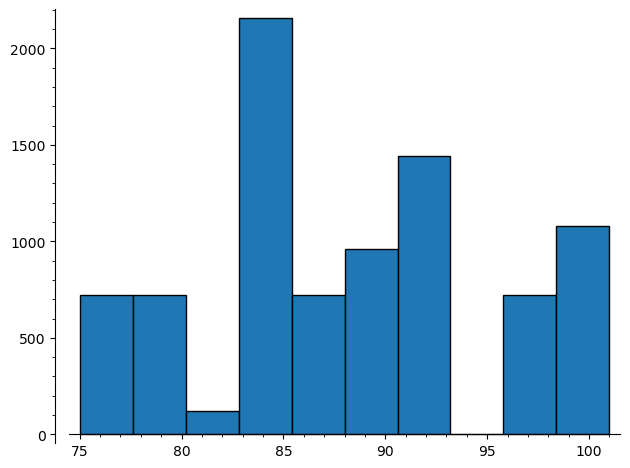

In [280]:
histogram(H7.degree_sequence())

In [282]:
a = NZF7[0]
b = NZF7[22]
a,b,a-b

((6, 6, 2, 5, 1, 6, 6, 5, 1, 4, 6, 3, 3, 5, 5),
 (6, 6, 2, 5, 1, 3, 2, 5, 5, 4, 6, 3, 6, 2, 1),
 (0, 0, 0, 0, 0, 3, 4, 0, 3, 0, 0, 0, 4, 3, 4))

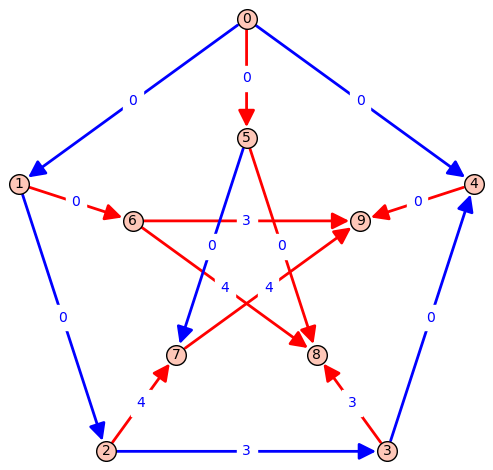

In [284]:
plot_flow(P,a-b)

In [288]:
H5.save('H5')

In [289]:
newH = load('H5.sobj')

In [291]:
H6.save('H6')

In [292]:
H7.save('H7')

# Questions for you

* Can you make the computation faster?
* Perhaps we don't need the whole graph, maybe half the edges suffice for connectivity?
* Does using cython help?
* Does using numpy help?
* Likely reprogramming the whole thing in C will make things faster. Can you combine Sage with C, so that you use Sage for stuff that is not repeated so often?

* How can we further verify correctness?

* How to package what we did so that it is maintainable and useful for others?

In [313]:
EP = P.edges(labels=False)
EP0 = P0.edges(labels=False)
type(EP), type(EP0)

(<class 'sage.graphs.views.EdgesView'>, <class 'sage.graphs.views.EdgesView'>)

In [314]:
EP0[0]

(0, 1)

In [312]:
(1,0) in EP, (0,1) in EP

(True, True)

In [315]:
(1,0) in EP0, (0,1) in EP0

(False, True)

In [318]:
H5.sparse6_string()

':~?Bo_O@_gC_wE_CI?oH_GG_GA?wJ_oF@cC?sBaGE@OM`KAACTAcVA_TaoV_cBBKC?gSAgXakTBcL`g]`{aA?RcS[BgaC[`CWccKRC?a_CU_GVawWDSl?gkdwmeGgdoobo^E?qd_lE?rdgpEc`CgkaOnaGdEsODoqcohdWqFK|Fc~Fs}f{}GC|G@A_{?@@B`KSFcBBPEao|GXD_xC`@D`w_H[bGKHAO}GseFo~HtQILOiHQiPRIdPisSGxVd{od?pIKYH@PIpZaohHHXc@KIXTdwvIhXJsbHhOcoyH{oJSpJX`kh?Id?I`dkdCjLELDYLLXJhhldcKxkLlEH@iLhmhXKhXohPpk`fMDoM\\akXtkHbMXsMtxF_|NCPF?|NKQExwn@za?xItUIx|nX{Nu@OC?DA?OM@OS@DO~i@ROC~GIBOcDDhROlCHP{OLLKDFJAHjPaNa@PDwNKwK`ynAKfXeqIOo]SPaRdPcOaLoYEQAQd`dd_uMIVmHqQYWqAPpIIRTgLQPRShFQYR]RQaXRY\\dWzLQNReMsCMKqNnyPnp~S[OKx|qU?Q[AKiVoADSIfsae_hfOydsqi_WNTcC@phSUHPQkTlhLY_Tu_SIlTyomhuSqk_ORMqgUTOKC\\IQMmQskPtbpsQDVU{_C}yv]sUq{cyKQaypiTVY{VkXQAUVCXBQuVj?lAyV\\VJAxVZAiAsjPjWc\\IQQUk^LiSVspEkJPq_UmvVNIpyaXRJxBJXcG@YxXJIeiPSZG_?gVcQEy{YChFRJ_WNXZQygmQYfdonYbT`GIWfCWjV`QQSrEY~QYZSZEVTBSZBYfbGXk]Ma`VDtU|IMQuXj[b`ASZNgHLZvOYNacGe[[UBB]bA`TJ\\[k`Sai[edTZa[^][Ja[jgg`gWRSgJSYr`\\S[GQfYj_f`FZbblZD[Zc\\k^LiiWzf'